In [175]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import imblearn
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

In [63]:
df = pd.read_csv("loan_data.csv")

#### Check for missing values!

In [64]:
df.isna().sum()

credit.policy        0
purpose              0
int.rate             0
installment          0
log.annual.inc       0
dti                  0
fico                 0
days.with.cr.line    0
revol.bal            0
revol.util           0
inq.last.6mths       0
delinq.2yrs          0
pub.rec              0
not.fully.paid       0
dtype: int64

### Inspect the our dataset's dtypes.

In [65]:
df.dtypes

credit.policy          int64
purpose               object
int.rate             float64
installment          float64
log.annual.inc       float64
dti                  float64
fico                   int64
days.with.cr.line    float64
revol.bal              int64
revol.util           float64
inq.last.6mths         int64
delinq.2yrs            int64
pub.rec                int64
not.fully.paid         int64
dtype: object

### Feature purpose is a object type so we need to encoded it.

In [66]:
dummies  = pd.get_dummies(df['purpose'])
df = pd.concat([df, dummies], axis = 1)
df.drop(['purpose'], axis=1, inplace=True)

In [67]:
df.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,all_other,credit_card,debt_consolidation,educational,home_improvement,major_purchase,small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,0,1,0,0,0,0,0


<AxesSubplot:>

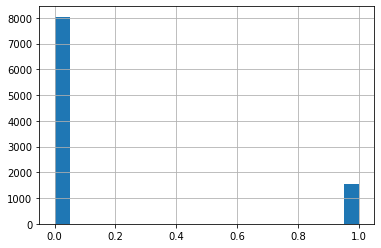

In [68]:
df['not.fully.paid'].hist(bins= 20)

### As we can see our target group is imbalanced so we will an oversampling technique. Moreover lets isnpect the accuracy of the models.

In [73]:
data = df.copy()

In [77]:
data.shape

(9578, 20)

In [78]:
data.drop('not.fully.paid', axis= 1, inplace=True)

In [80]:
target = df['not.fully.paid']

### Split the dataset into train and test.

In [126]:
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.4)

In [134]:
clf = LogisticRegression()
clf.fit(X_train, y_train)
pred =clf.predict(X_test)

print(f'Logistic Regression accuracy: {accuracy_score(y_test, pred)}')

Logistic Regression accuracy: 0.8376826722338204


### Lets scale our dataset.

In [128]:
standar_scaler = StandardScaler()
standar_scaler.fit(X_train)

StandardScaler()

In [129]:
X_train_ss = standar_scaler.transform(X_train)
X_test_ss = standar_scaler.transform(X_test)

In [136]:
clf = LogisticRegression()
clf.fit(X_train_ss, y_train)
pred_ss = clf.predict(X_test_ss)

print(f'Logistic regression accuracy with Standard data: {accuracy_score(y_test, pred_ss)}')


Logistic regression accuracy with Standard data: 0.8363778705636743


### Lets try The Decision Trees.

In [163]:
dt = DecisionTreeClassifier(max_depth=5)
dt.fit(X_train, y_train)
pred_dt = dt.predict(X_test)

print(classification_report(y_test, pred_dt))

              precision    recall  f1-score   support

           0       0.84      0.99      0.91      3210
           1       0.33      0.02      0.04       622

    accuracy                           0.83      3832
   macro avg       0.58      0.51      0.48      3832
weighted avg       0.76      0.83      0.77      3832



### Lets try K-nn Classifier

In [139]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
pred_knn = knn.predict(X_test)

print(f'K-nn accuracy: {(accuracy_score(pred_knn, y_test))}')

K-nn accuracy: 0.8162839248434238


In [141]:
knn = KNeighborsClassifier()
knn.fit(X_train_ss, y_train)
pred_knn = knn.predict(X_test_ss)

print(f'K-nn accuracy with Standard data: {(accuracy_score(pred_knn, y_test))}')

K-nn accuracy with Standard data: 0.8241127348643006


### Lets balance the sample with SMOTE algorithm.

In [143]:
classes, counts = np.unique(target, return_counts=True)
for i in range(len(classes)):
    print(f'Class {classes[i]}: {counts[i]}')

Class 0: 8045
Class 1: 1533


In [144]:
classes, counts = np.unique(y_train, return_counts=True)
for i in range(len(classes)):
    print(f'Class {classes[i]}: {counts[i]}')

Class 0: 4835
Class 1: 911


In [170]:
smote = SMOTE()
X_smote, y_smote = smote.fit_resample(X_train, y_train)

In [171]:
classes, counts = np.unique(y_smote, return_counts=True)
for i in range(len(classes)):
    print(f'Class {classes[i]}: {counts[i]}')

Class 0: 4835
Class 1: 4835


In [174]:

dt = DecisionTreeClassifier(max_depth=2)
dt.fit(X_smote, y_smote)
pred = dt.predict(X_test)

print(classification_report(y_test, pred))


              precision    recall  f1-score   support

           0       0.86      0.86      0.86      3210
           1       0.28      0.29      0.28       622

    accuracy                           0.76      3832
   macro avg       0.57      0.57      0.57      3832
weighted avg       0.77      0.76      0.76      3832



In [156]:
clf = LogisticRegression()
clf.fit(X_smote, y_smote)
pred =clf.predict(X_test)

print(f'Logistic Regression accuracy: {accuracy_score(y_test, pred)}')

Logistic Regression accuracy: 0.625


C:\Users\giann\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [157]:
knn = KNeighborsClassifier()
knn.fit(X_smote, y_smote)
pred_knn = knn.predict(X_test)

print(f'K-nn accuracy: {(accuracy_score(pred_knn, y_test))}')

K-nn accuracy: 0.5913361169102297


### Lets try Undersample our Data. 

In [178]:
under_sampler = RandomUnderSampler()
X_under, y_under = under_sampler.fit_resample(X_train, y_train)

In [177]:
classes, counts = np.unique(y_under, return_counts=True)
for i in range(len(classes)):
    print(f'Class {classes[i]}: {counts[i]}')

Class 0: 911
Class 1: 911


In [179]:
dt = DecisionTreeClassifier(max_depth=2)
dt.fit(X_under, y_under)
pred = dt.predict(X_test)

print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.86      0.84      0.85      3210
           1       0.27      0.31      0.29       622

    accuracy                           0.75      3832
   macro avg       0.57      0.57      0.57      3832
weighted avg       0.77      0.75      0.76      3832

